# **Comparative Analysis of Machine Learning Models for Salary Prediction**

### **Navie Bayes Classifier Model**

<font color="red"> <b> Members </b> </font>

<font> <b>
- Chanrith Natvaddhtharo
- Tep Sovannpanha  
- John Kimleang  
- Horm Mannchhi 
- Sombath Vinun 
    </b></font>

## **Importing Libraries**

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
from pandas import DataFrame

from numpy import ndarray

# **Exploring Dataset**

Importing dataset using Pandas

In [98]:
df: DataFrame = pd.read_csv('salary.csv')

Viewing dataset and all its columns

In [99]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## **Check for Missing/Null Values**

In [100]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

## **Check for Duplicated Values**

In [101]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 24


In [102]:
# Remove duplicates
df = df.drop_duplicates()

# Verify duplicates are removed
duplicates = df.duplicated()
print(f"Number of duplicate rows after removal: {duplicates.sum()}")

Number of duplicate rows after removal: 0


Counts the number of occurrences of each unique value in the `education` column.  

In [103]:
df.education.value_counts()

education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

# **One-Hot Encoding**

The purpose of **One-Hot Encoding** is to convert categorical data into a numerical format that can be used for Machine Learning algorithms.
It creates a binary column for each category in the data, where each observation is marked with a 1 in the column for its corresponding category and 0 in the other columns. This allows the Machine Learning algorithms to understand the categorical data as numerical data and make predications based on it. It also prevents ordering from being introduces into the data which can affect the model predictions. 

Counts the number of occurrences of each unique value in the `occupation` column.  

In [104]:
df.occupation.value_counts()

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

Creating dummy variables for the `occupation` column using **One-Hot Encoding**. 
It first drops the `occupation` column and then concatenates the original DataFrame with the new dummy variables. 

In [105]:
df: DataFrame = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1) 

In [106]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,relationship,race,sex,capital-gain,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,39,State-gov,77516,Bachelors,13,Never-married,Not-in-family,White,Male,2174,...,False,False,False,False,False,False,False,False,False,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,...,False,False,False,False,False,False,False,False,False,False
2,38,Private,215646,HS-grad,9,Divorced,Not-in-family,White,Male,0,...,False,True,False,False,False,False,False,False,False,False
3,53,Private,234721,11th,7,Married-civ-spouse,Husband,Black,Male,0,...,False,True,False,False,False,False,False,False,False,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Wife,White,Female,0,...,False,False,False,False,False,False,False,False,True,False
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,...,False,False,True,False,False,False,False,False,False,False
32558,58,Private,151910,HS-grad,9,Widowed,Unmarried,White,Female,0,...,False,False,False,False,False,False,False,False,False,False
32559,22,Private,201490,HS-grad,9,Never-married,Own-child,White,Male,0,...,False,False,False,False,False,False,False,False,False,False


Creating dummy variables for the `workclass` column using **One-Hot Encoding**. 
It first drops the `workclass` column and then concatenates the original DataFrame with the new dummy variables. 

In [107]:
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)

Dropping the `education` column as it is not needed. 

In [108]:
df = df.drop('education', axis=1)

Creating dummy variables for the `marital-status` column using **One-Hot Encoding**. 
It first drops the `marital-status` column and then concatenates the original DataFrame with the new dummy variables.

In [109]:
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)

Creating dummy variables for the `relationship` column using **One-Hot Encoding**. 
It first drops the `relationship` column and then concatenates the original DataFrame with the new dummy variables.

In [110]:
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)

Creating dummy variables for the `race` column using **One-Hot Encoding**. 
It first drops the `race` column and then concatenates the original DataFrame with the new dummy variables.

In [111]:
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)

Creating dummy variables for the `native-country` column using **One-Hot Encoding**. 
It first drops the `native-country` column and then concatenates the original DataFrame with the new dummy variables.

In [112]:
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)

Creating a new column `sex` in the DataFrame by applying a lambda function tot the values in the existing `sex` column. 
The lambda function checks if the values in the `sex` column is equal to 'Male' and returns 1 if it is, and 0 otherwise (Female). 
This is a binary attribute. 

In [113]:
df['sex'] = df['sex'].str.strip().apply(lambda x: 1 if x == 'Male' else 0)


Creating a new column `salary` in the DataFrame by applying a lambda function tot the values in the existing `salary` column. 
The lambda function checks if the values in the `salary` column is equal to '>50K' and returns 1 if it is, and 0 otherwise ('<50K'). 
This is a binary attribute. 

In [114]:
df['salary'] = df['salary'].str.strip().apply(lambda x: 1 if x == '>50K' else 0)


In [115]:
df

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,occupation_ ?,occupation_ Adm-clerical,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,1,2174,0,40,0,False,True,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,1,0,0,13,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,0,38,0,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,40,154374,9,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,58,151910,9,0,0,0,40,0,False,True,...,False,False,False,False,False,False,False,True,False,False
32559,22,201490,9,1,0,0,20,0,False,True,...,False,False,False,False,False,False,False,True,False,False


Creating a heatmap of the correlation matrix. 
This creates a 18 by 12 inch figure (heatmap in this case). 
Each cell in the heatmap represents the correlation between 2 variables in the data frame.

This visualizes the the relationships between variables making it easier to identify trends and patterns within the data. 
This information can be useful for feature selection, identifying potential predictors, and understanding the underlying structure of the data. 

<Axes: >

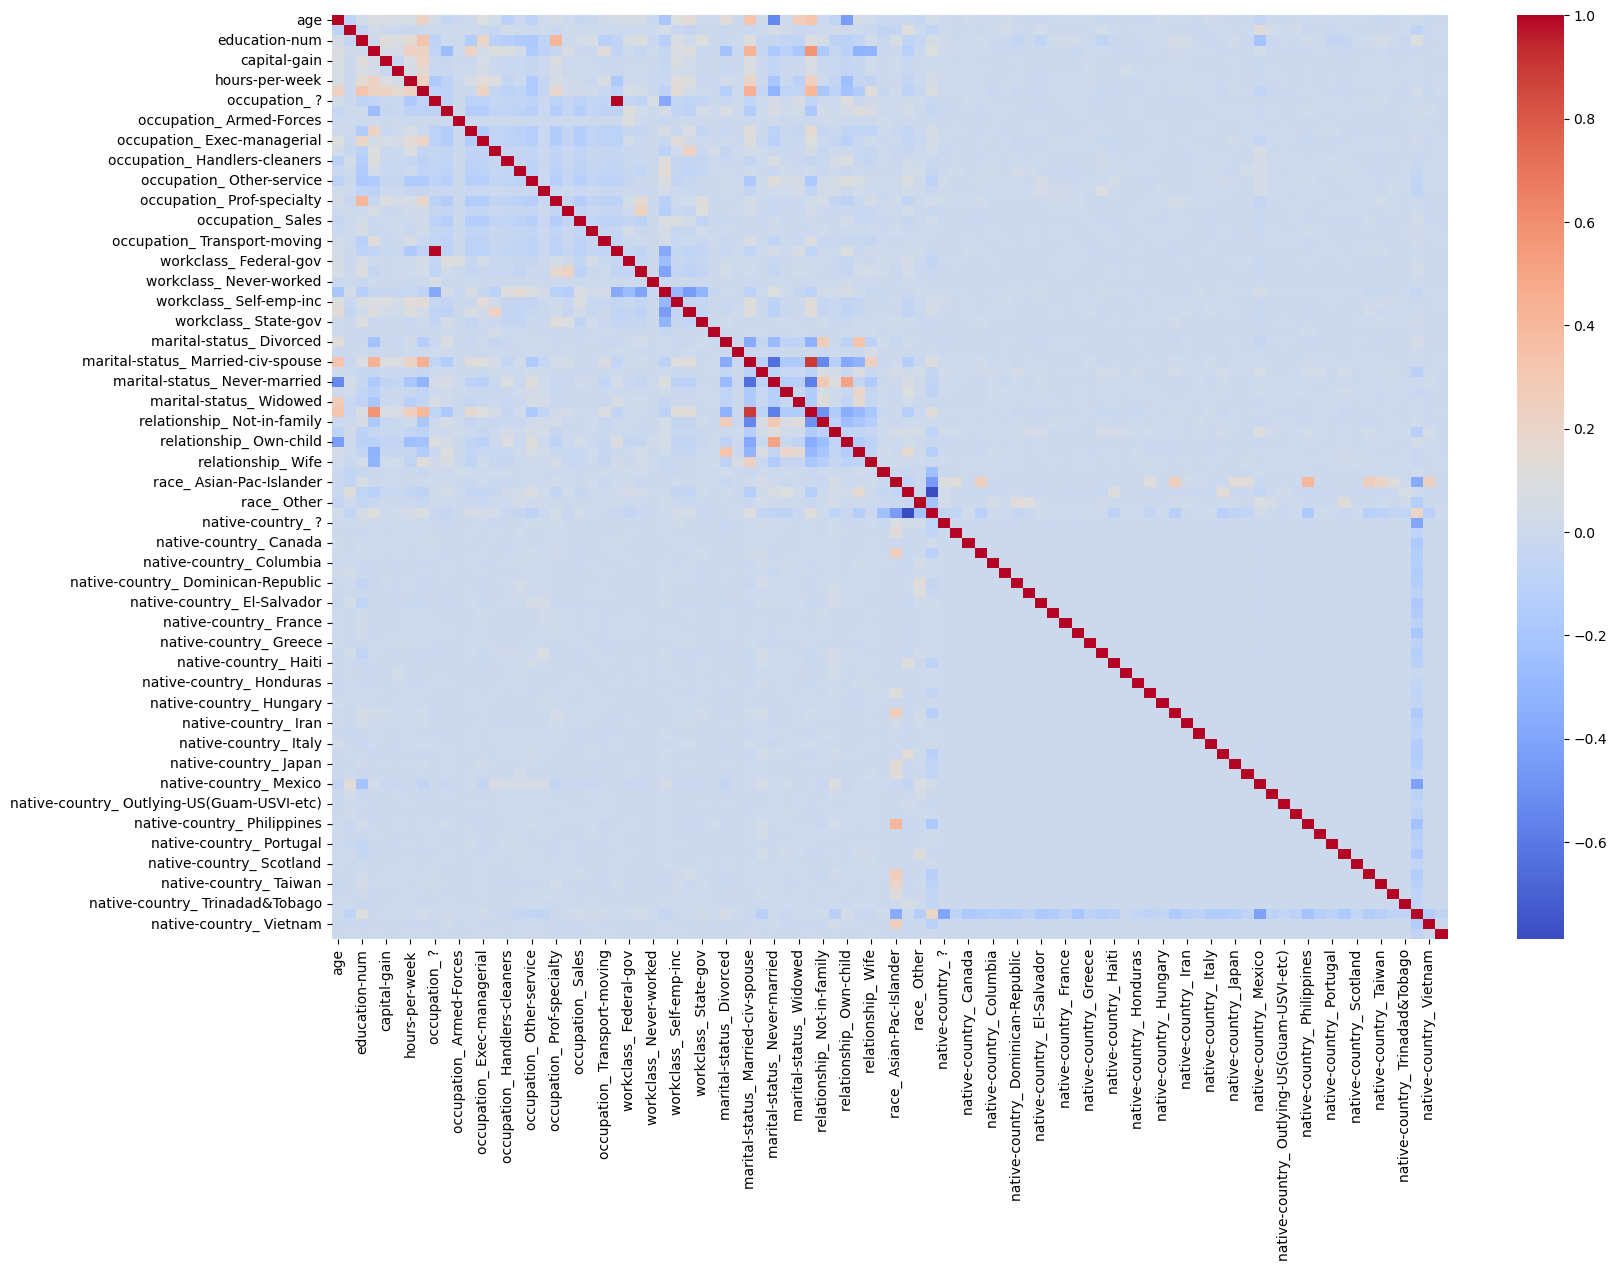

In [116]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

Calculating the absolute correlation between the `salary` column and all other columns in the data frame. 
1. The correlation between all the pairs of columns using the `corr()` function. This returns a Pandas Series object containing the correlation coefficients in the data frame (similar to a dictionary.)
2. The `['salary']` argument specifies that the correction to be calculated is for the `salary`
3. Finally the absolute value of the correlations is computed using the `abs()` function. 

In [117]:
correlations = df.corr()['salary'].abs() 

Sorting the correlation coefficients in ascending order. 
By default, this returns a new Series objects.

In [118]:
sorted_correlations = correlations.sort_values()

Calculating the number of columns to drop. 
In this case, 80% of the columns will be dropped. 
This is done to reduce the size of the data frame, improving performance and simplifying the data analysis. 
The data is still large enough for it to be useful.  

In [119]:
num_cols_to_drop = int(0.8 * len(df.columns))

Selecting the actual columns that need to be dropped.
This will drop from the first column to the number computed in the previous cell.

In [120]:
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index

Dropping the columns that were previously selected. 

In [121]:
df_dropped = df.drop(cols_to_drop, axis=1)

In [122]:
df_dropped

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,occupation_ Exec-managerial,occupation_ Other-service,occupation_ Prof-specialty,workclass_ Self-emp-inc,marital-status_ Divorced,marital-status_ Married-civ-spouse,marital-status_ Never-married,relationship_ Husband,relationship_ Not-in-family,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,13,1,2174,0,40,0,False,False,False,False,False,False,True,False,True,False,False,False
1,50,13,1,0,0,13,0,True,False,False,False,False,True,False,True,False,False,False,False
2,38,9,1,0,0,40,0,False,False,False,False,True,False,False,False,True,False,False,False
3,53,7,1,0,0,40,0,False,False,False,False,False,True,False,True,False,False,False,False
4,28,13,0,0,0,40,0,False,False,True,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
32557,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
32558,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
32559,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


Visualizing heatmap again after dropping some columns. 
Displaying values for correlations this time. 

<Axes: >

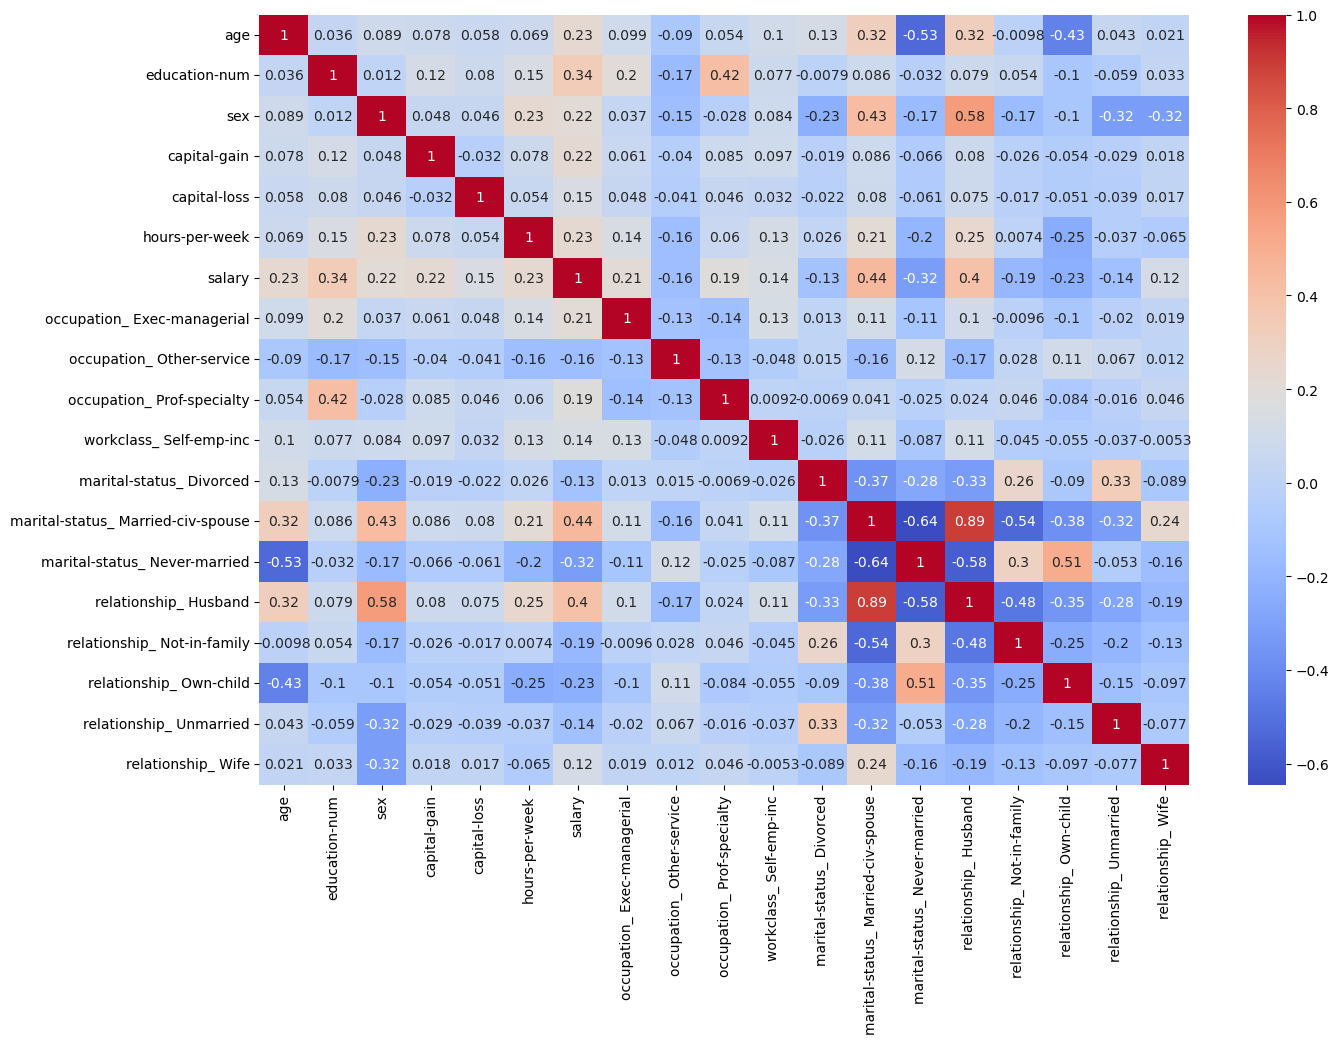

In [123]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

# **Splitting Dataset**

Dropping the `fnlwgt` as it is redundant. 

In [124]:
df: DataFrame = df.drop('fnlwgt', axis=1)

Splitting the big data frame into 2 smaller data frames:
- Training - 80% of the larger data frame used for training the model.
- Testing - 20% of the larger data frame used for testing the trained model against for its accuracy. 

In [125]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [126]:
train_df

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
3671,75,7,1,0,0,30,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
11110,40,10,1,4787,0,50,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6370,44,13,0,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
24272,31,10,1,7298,0,50,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
20124,37,13,1,0,0,15,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4246,39,13,0,0,0,50,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1246,54,15,1,99999,0,60,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
11391,58,10,0,0,0,36,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32432,36,1,1,0,0,72,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [127]:
test_df

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
4251,43,9,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
19032,34,10,1,0,0,42,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4384,27,9,1,5013,0,46,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18793,35,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4259,32,10,1,0,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25599,30,10,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3894,54,9,1,0,0,40,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
28219,44,10,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8852,45,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Splitting both the 2 data frames into features `X` and variables `y`.


In [128]:
X_train: DataFrame = train_df.drop('salary', axis=1)
y_train: DataFrame = train_df['salary']

X_test: DataFrame = test_df.drop('salary', axis=1)
y_test: DataFrame = test_df['salary']

# **Training**

Training different algorithms on the data and comparing their performance.

## **Naive Bayes Classifier**

In [138]:
nbc = GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB()

Calculating the accuracy score of the model against the test set. 
It makes predictions on the features and computes a predictions, it then compares its predictions with the actual data within.

In [139]:
naive_bayes_score: float = nbc.score(X_test, y_test)
naive_bayes_score

0.7914874001229256

# **Hyperparameter Tuning**

Hyperparameter tuning is the process of selecting the optimal hyperparameters for a machine learning model. Hyperparameters are parameters that are set before training the model, such as the learning rate, regularization strength, and number of hidden layers in a neural network. 

Hyperparameter tuning works by selecting different values for the hyperparameters and evaluating the performance of the model on a validation set. The hyperparameters that result in the best performance on the validation set are selected as the optimal hyperparameters for the model. 

Hyperparameter tuning is important because it can significantly improve the performance of a machine learning model. By selecting the optimal hyperparameters, the model can better fit the training data and generalize to new data.

## **Naive Bayes**

In [160]:
param_grid_nb: dict[str, list[float]] = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

In [161]:
grid_search_nb = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=10)

In [162]:
grid_search_nb.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START var_smoothing=1e-09.........................................
[CV 1/5; 1/5] END ..........var_smoothing=1e-09;, score=0.801 total time=   0.0s
[CV 2/5; 1/5] START var_smoothing=1e-09.........................................
[CV 2/5; 1/5] END ..........var_smoothing=1e-09;, score=0.789 total time=   0.0s
[CV 3/5; 1/5] START var_smoothing=1e-09.........................................
[CV 3/5; 1/5] END ..........var_smoothing=1e-09;, score=0.801 total time=   0.0s
[CV 4/5; 1/5] START var_smoothing=1e-09.........................................
[CV 4/5; 1/5] END ..........var_smoothing=1e-09;, score=0.800 total time=   0.0s
[CV 5/5; 1/5] START var_smoothing=1e-09.........................................
[CV 5/5; 1/5] END ..........var_smoothing=1e-09;, score=0.792 total time=   0.0s
[CV 1/5; 2/5] START var_smoothing=1e-08.........................................
[CV 1/5; 2/5] END ..........var_smoothing=1e-08;,

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             verbose=10)

In [163]:
naive_bayes_best = grid_search_nb.best_estimator_
naive_bayes_best

GaussianNB()

In [164]:
naive_bayes_best.score(X_test, y_test)

0.7914874001229256